In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import os
import shutil

In [2]:
os.environ['KAGGLE_CONFIG_DIR']="/content"

In [3]:
!kaggle datasets download -d plameneduardo/sarscov2-ctscan-dataset

 90% 208M/230M [00:01<00:00, 102MB/s]
100% 230M/230M [00:01<00:00, 129MB/s]


In [4]:
from zipfile import ZipFile
fname='/content/sarscov2-ctscan-dataset.zip'
with ZipFile(fname,'r') as zip:
  zip.extractall()
  print('done')

done


In [5]:
os.mkdir('dataset')
shutil.move('/content/COVID','dataset')
shutil.move('/content/non-COVID','dataset')

'dataset/non-COVID'

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,AveragePooling2D,Dropout,Conv2D,MaxPool2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix,roc_curve,accuracy_score
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [7]:
IMAGE_SIZE=[224,224]

epochs=50
batch_size=32

covid_path='/content/dataset/COVID'
non_covid_path='/content/dataset/non-COVID'

covid_files=glob(covid_path+'/*')
non_covid_files=glob(non_covid_path+'/*')

In [8]:
covid_labels=[]
non_covid_labels=[]


covid_images=[]
non_covid_images=[]


import cv2
for i in range(len(covid_files)):
  image=cv2.imread(covid_files[i])
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image=cv2.resize(image,(224,224))
  covid_images.append(image)
  covid_labels.append('covid')

for i in range(len(non_covid_files)):
  image=cv2.imread(non_covid_files[i])
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image=cv2.resize(image,(224,224))
  non_covid_images.append(image)
  non_covid_labels.append('non_covid')

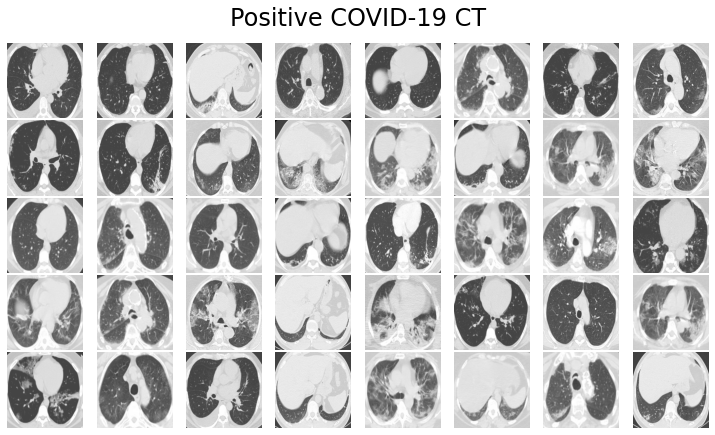

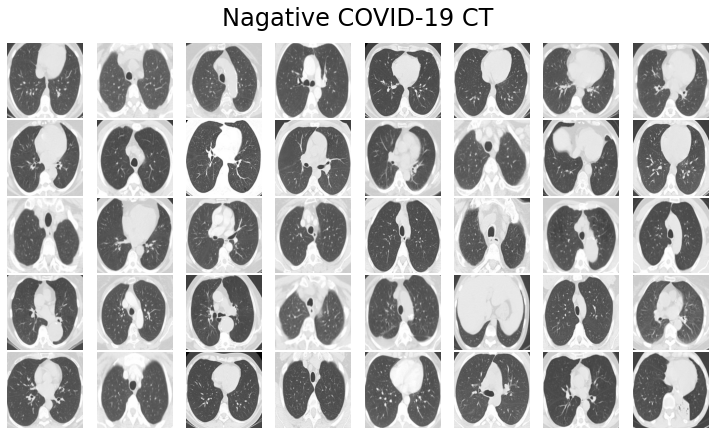

In [11]:
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
plot_images(covid_images, 'Positive COVID-19 CT')
plot_images(non_covid_images, 'Nagative COVID-19 CT')

In [12]:
covid_images=np.array(covid_images)/255.0
non_covid_images=np.array(non_covid_images)/255.0

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

#split to train,test
covid_x_train,covid_x_test,covid_y_train,covid_y_test=train_test_split(covid_images,covid_labels,test_size=.2)
non_covid_x_train,non_covid_x_test,non_covid_y_train,non_covid_y_test=train_test_split(non_covid_images,non_covid_labels,test_size=.2)


X_train=np.concatenate((non_covid_x_train,covid_x_train),axis=0)
X_test=np.concatenate((non_covid_x_test,covid_x_test),axis=0)
Y_train=np.concatenate((non_covid_y_train,covid_y_train),axis=0)
Y_test=np.concatenate((non_covid_y_test,covid_y_test),axis=0)

In [14]:
Y_train=LabelBinarizer().fit_transform(Y_train)
Y_train=to_categorical(Y_train)

Y_test=LabelBinarizer().fit_transform(Y_test)
Y_test=to_categorical(Y_test)

In [142]:
# x=Conv2D(32,kernel_size=(3,3),padding='same',activation='relu')(input)
# x=Dropout(.25)(x)
# x=Conv2D(32,kernel_size=(3,3),padding='same',activation='relu')(x)
# x=Dropout(.25)(x)
# x=MaxPooling2D(pool_size=(2,2),strides=2)(x)

# x=Conv2D(64,kernel_size=(3,3),padding='same',activation='relu')(input)
# x=Dropout(.25)(x)
# x=Conv2D(64,kernel_size=(3,3),padding='same',activation='relu')(x)
# x=Dropout(.25)(x)
# x=MaxPooling2D(pool_size=(2,2),strides=2)(x)

# x=Conv2D(128,kernel_size=(3,3),padding='same',activation='relu')(x)
# x=Dropout(.25)(x)
# x=Conv2D(128,kernel_size=(3,3),padding='same',activation='relu')(x)
# x=Dropout(.25)(x)
# x=MaxPooling2D(pool_size=(2,2),strides=2)(x)

# x=Conv2D(256,kernel_size=(3,3),padding='same',activation='relu')(x)
# x=Dropout(.25)(x)
# # x=Conv2D(256,kernel_size=(3,3),padding='same',activation='relu')(x)
# # x=Dropout(.25)(x)
# x=MaxPooling2D(pool_size=(2,2),strides=2)(x)

# x=Conv2D(256,kernel_size=(3,3),padding='same',activation='relu')(x)
# x=Dropout(.25)(x)
# # x=Conv2D(256,kernel_size=(3,3),padding='same',activation='relu')(x)
# # x=Dropout(.25)(x)
# x=MaxPooling2D(pool_size=(2,2),strides=2)(x)

# x=Conv2D(512,kernel_size=(3,3),padding='same',activation='relu')(x)
# x=Dropout(.25)(x)
# # x=Conv2D(512,kernel_size=(3,3),padding='same',activation='relu')(x)
# # x=Dropout(.25)(x)
# x=MaxPooling2D(pool_size=(2,2),strides=2)(x)

# x=Flatten(name='flattern')(x)

# x=Dense(512,activation='relu')(x)
# x=Dropout(.5)(x)
# x=Dense(32,activation='relu')(x)
# x=Dropout(.5)(x)
# out=Dense(2,activation='softmax')(x)

# model=Model(inputs=input,outputs=out,name='Custom_ct')



In [15]:
mob=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [9]:
mob=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

outputs=mob.output
outputs=Flatten(name='flattern')(outputs)
outputs=Dropout(.5)(outputs)
outputs=Dense(2,activation='softmax')(outputs)

model=Model(inputs=mob.input,outputs=outputs)

for layer in mob.layers[:-39]:
  layer.trainable=False

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

train_aug=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=.2,
    height_shift_range=.2,
    horizontal_flip=True
)

9412608/9406464 [==============================] - 0s 0us/step


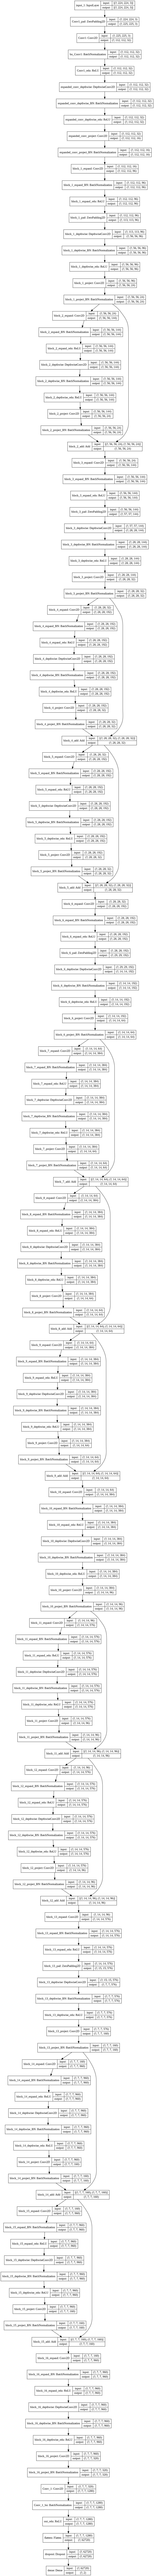

In [10]:
tf.keras.utils.plot_model(model,"my model.png",show_shapes=True)

In [17]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [18]:
train_aug=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=.2,
    height_shift_range=.2,
    horizontal_flip=True
)

In [19]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')

In [149]:
#change the dimension
# X_train=X_train.reshape(X_train.shape[0],224,224,1)
# X_test=X_test.reshape(X_test.shape[0],224,224,1)

In [20]:
history=model.fit(train_aug.flow(X_train,Y_train,batch_size=32),
                  validation_data=(X_test,Y_test),
                  validation_steps=len(X_test)/32,
                  steps_per_epoch=len(X_train)/32,
                  callbacks=[checkpoint],
                  epochs=70,
                  shuffle=True
)

Epoch 1/70
62/62 [==============================] - ETA: 0s - loss: 1.1948 - accuracy: 0.7747
Epoch 00001: val_loss improved from inf to 58.80288, saving model to model.h5
62/62 [==============================] - 21s 343ms/step - loss: 1.1948 - accuracy: 0.7747 - val_loss: 58.8029 - val_accuracy: 0.4950
Epoch 2/70
62/62 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.8498
Epoch 00002: val_loss did not improve from 58.80288
62/62 [==============================] - 20s 315ms/step - loss: 0.6948 - accuracy: 0.8498 - val_loss: 69.4120 - val_accuracy: 0.4950
Epoch 3/70
62/62 [==============================] - ETA: 0s - loss: 0.3399 - accuracy: 0.8947
Epoch 00003: val_loss improved from 58.80288 to 41.87892, saving model to model.h5
62/62 [==============================] - 20s 320ms/step - loss: 0.3399 - accuracy: 0.8947 - val_loss: 41.8789 - val_accuracy: 0.5755
Epoch 4/70
62/62 [==============================] - ETA: 0s - loss: 0.2236 - accuracy: 0.9153
Epoch 00004:

In [21]:
shutil.copy2('/content/MobilenetV2_ct.h5','/content/drive/My Drive/Untitled folder')

'/content/drive/My Drive/Untitled folder/MobilenetV2_ct.h5'

In [24]:
model=load_model('/content/MobilenetV2_ct.h5')

In [25]:
y_pred=model.predict(X_test,batch_size=32)

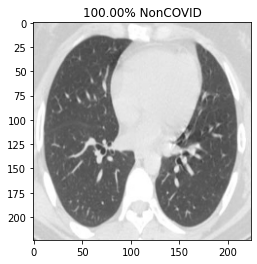

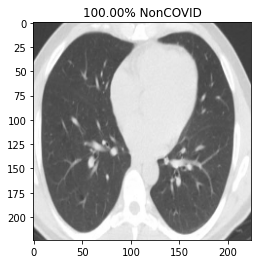

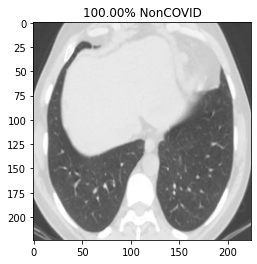

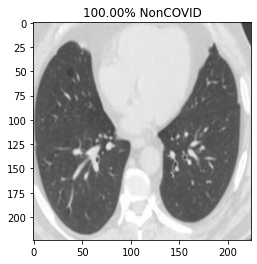

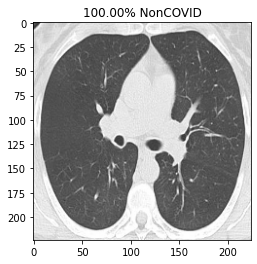

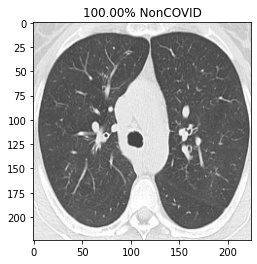

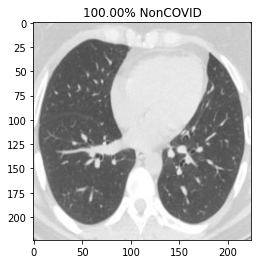

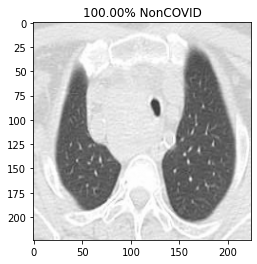

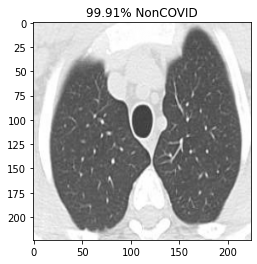

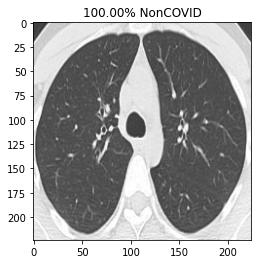

In [26]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% NonCOVID')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% COVID')
  plt.imshow(X_test[index])
  plt.show()

In [28]:
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(Y_test, axis=1)

Confusion Matrix without Normalization


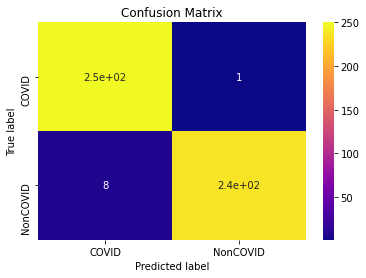

Confusion Matrix with Normalized Values


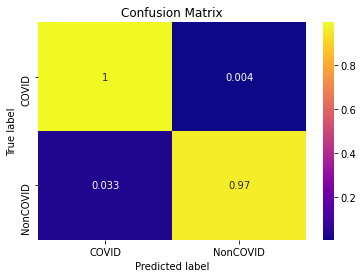

In [29]:
import seaborn as sns
def plot_confusion_matrix(normalize):
  classes = ['COVID','NonCOVID']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

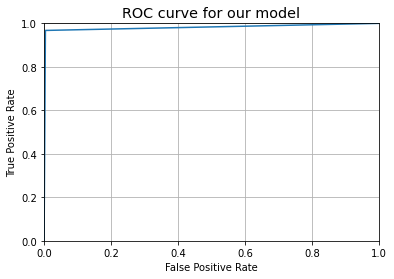

In [30]:
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       251
           1       1.00      0.97      0.98       246

    accuracy                           0.98       497
   macro avg       0.98      0.98      0.98       497
weighted avg       0.98      0.98      0.98       497



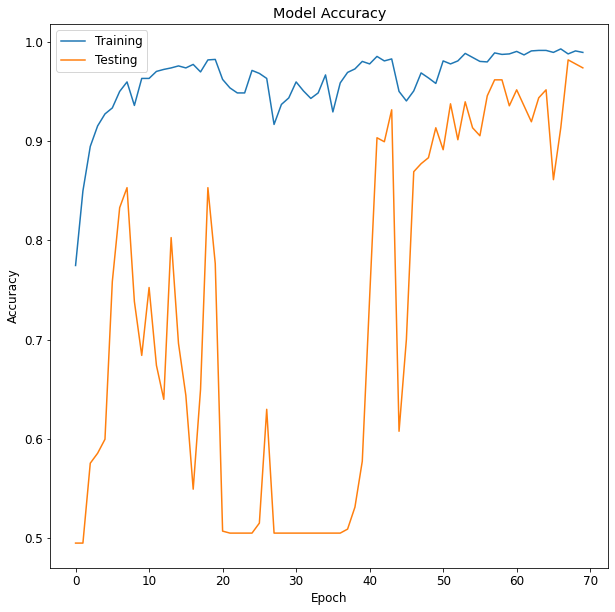

In [32]:
plt.figure(figsize=(10,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.show()

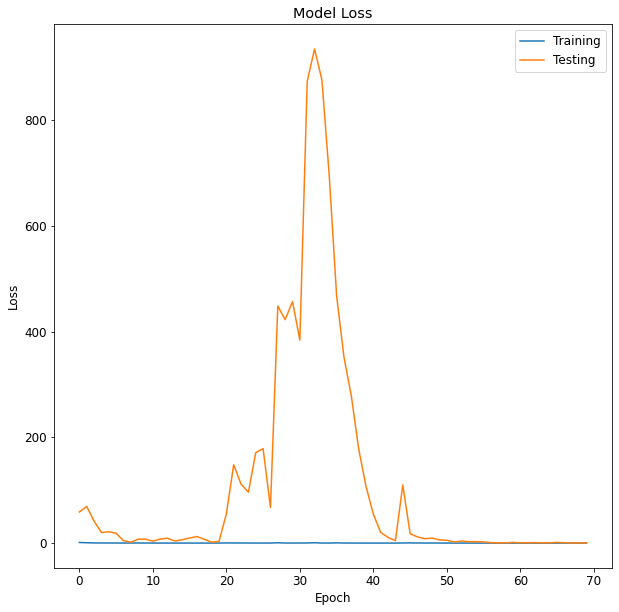

In [33]:
plt.figure(figsize=(10,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('vgg_chest_loss.png')
plt.show()